<h1><center>Top Spotify songs 2010-2019</center></h1>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='dark')
%matplotlib inline

In [2]:
spotify = pd.read_csv("top10s.csv", encoding='ISO-8859-1')
spotify.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


- Genre - the genre of the track
- Year - the release year of the recording
- Added - the earliest date you added the track to your collection
- Beats Per Minute (BPM) - The tempo of the song
* Energy - The energy of a song - the higher the value, the more energtic
* Danceability - The higher the value, the easier it is to dance to this song
* Loudness (dB) - The higher the value, the louder the song
* Liveness - The higher the value, the more likely the song is a live recording
* Valence - The higher the value, the more positive mood for the song
* Length - The duration of the song
* Acousticness - The higher the value the more acoustic the song is
* Speechiness - The higher the value the more spoken word the song contains
* Popularity - The higher the value the more popular the song is
* Duration - The length of the song

In [4]:
spotify.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
spotify.duplicated().sum()

0

No duplicated records in the dataset

In [6]:
spotify.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

No missing values in the dataset

In [7]:
spotify.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)

In [8]:
spotify.columns

Index(['song', 'artist', 'genre', 'year', 'beats_per_minute', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [9]:
spotify.describe()

,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


### Genre

In [10]:
spotify['genre'].nunique()

50

In [11]:
spotify['genre'].value_counts().head()

dance pop        327
pop               60
canadian pop      34
boy band          15
barbadian pop     15
Name: genre, dtype: int64

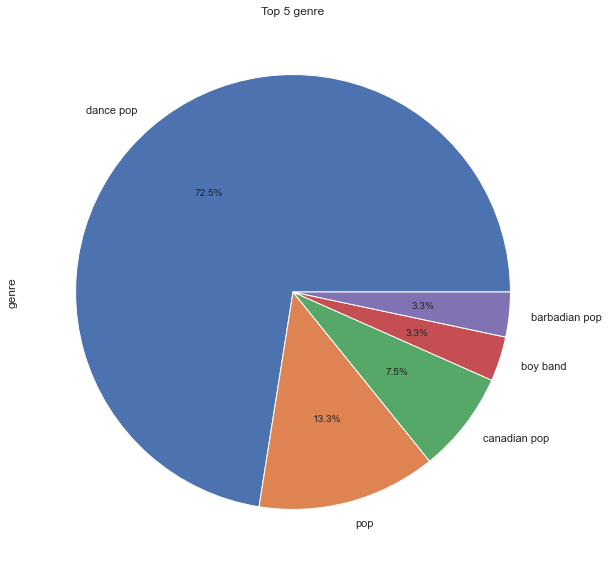

In [12]:
spotify['genre'].value_counts().head(5).plot.pie(figsize=(10,10), autopct='%1.1f%%')
plt.title('Top 5 genre');

* There are 50 genres of music in this dataset
* Dance-pop is the top genre on Spotify

### Artist

In [13]:
spotify['artist'].nunique()

184

In [14]:
spotify['artist'].value_counts().iloc[:5]

Katy Perry       17
Justin Bieber    16
Maroon 5         15
Rihanna          15
Lady Gaga        14
Name: artist, dtype: int64

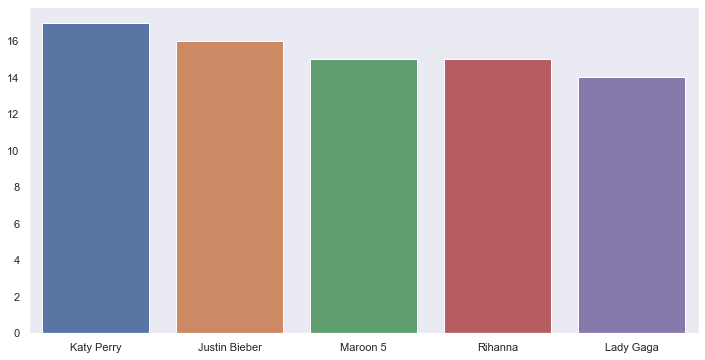

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=spotify['artist'].value_counts().iloc[:5].index, y = spotify['artist'].value_counts().iloc[:5].values, data=spotify);

* There are 184 artists in this dataset
* Katy Perry has the highest number of top songs followed by Justin Bieber

### Beats per minute

In [16]:
spotify.beats_per_minute.describe()

count    603.000000
mean     118.545605
std       24.795358
min        0.000000
25%      100.000000
50%      120.000000
75%      129.000000
max      206.000000
Name: beats_per_minute, dtype: float64

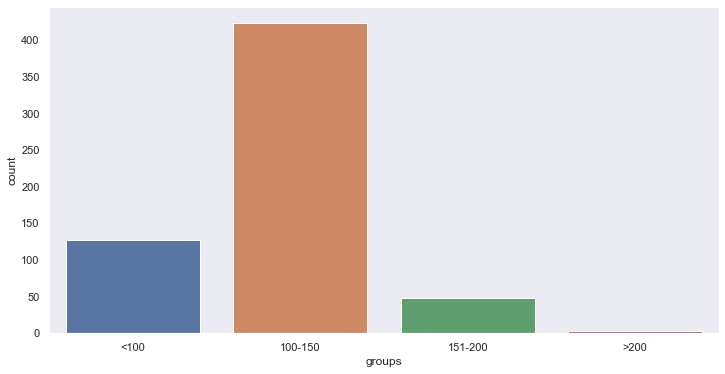

In [17]:
def grouping(x):
    if x < 100:
        return '<100'
    elif x <= 150:
        return '100-150'
    elif x <= 200:
        return '151-200'
    else:
        return '>200'

spotify['groups'] = spotify['beats_per_minute'].apply(grouping)
plt.figure(figsize=(12, 6))
sns.countplot(x='groups', data = spotify);

In [18]:
spotify.iloc[spotify['beats_per_minute'].argmax()]

song                FourFiveSeconds
artist                      Rihanna
genre                 barbadian pop
year                           2015
beats_per_minute                206
energy                           27
danceability                     58
loudness                         -6
liveness                         13
valence                          35
length                          188
acousticness                     88
speechiness                       5
popularity                       80
groups                         >200
Name: 276, dtype: object

* Most of the top songs have 100-150 beats per minute (bpm)
* "FourFiveSeconds" by Rihanna is the song with the highest bpm 

### Danceability

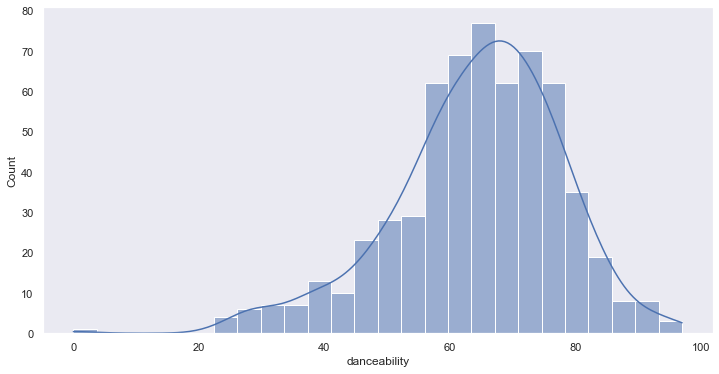

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(x='danceability', data=spotify, kde=True);

In [20]:
spotify.sort_values(by='danceability', ascending=False).head(5)[['song', 'artist', 'year', 'danceability']]

,song,artist,year,danceability
570,Drip (feat. Migos),Cardi B,2018,97
539,Bad Liar,Selena Gomez,2018,97
257,Anaconda,Nicki Minaj,2014,96
389,Me Too,Meghan Trainor,2016,93
477,Bodak Yellow,Cardi B,2017,93


* "Drip" by Cardi B and "Bad Liar" by Selena Gomez are the easiest songs to dance

### Popularity

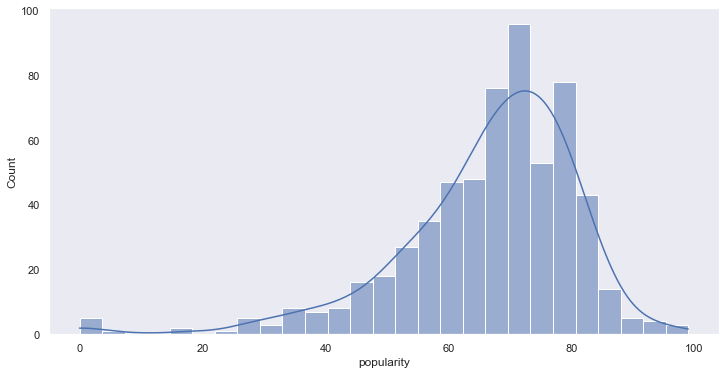

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(x='popularity', data=spotify, kde=True);

In [22]:
spotify.sort_values(by='popularity', ascending=False).head(5)[['song', 'artist', 'year', 'popularity']]

,song,artist,year,popularity
572,Memories,Maroon 5,2019,99
573,Lose You To Love Me,Selena Gomez,2019,97
574,Someone You Loved,Lewis Capaldi,2019,96
575,Señorita,Shawn Mendes,2019,95
576,How Do You Sleep?,Sam Smith,2019,93


* The most popular song is "Memories" by Maroon 5 followed by "Lose You To Love Me" by Selena Gomez

### Energy

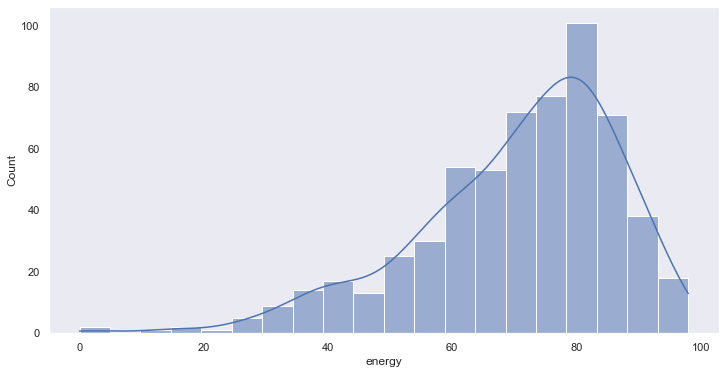

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(x='energy', data=spotify, kde=True);

In [24]:
spotify.sort_values(by='energy', ascending=False).head(5)[['song', 'artist', 'year', 'energy']]

,song,artist,year,energy
198,Pom Poms,Jonas Brothers,2013,98
50,Hello,Martin Solveig,2010,98
134,Don't Stop the Party (feat. TJR),Pitbull,2012,96
181,Rock N Roll,Avril Lavigne,2013,96
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,2013,95


* The most energetic songs are "Hello" by Martin Solveig and "Pom Poms" by Jonas Brothers

### Duration

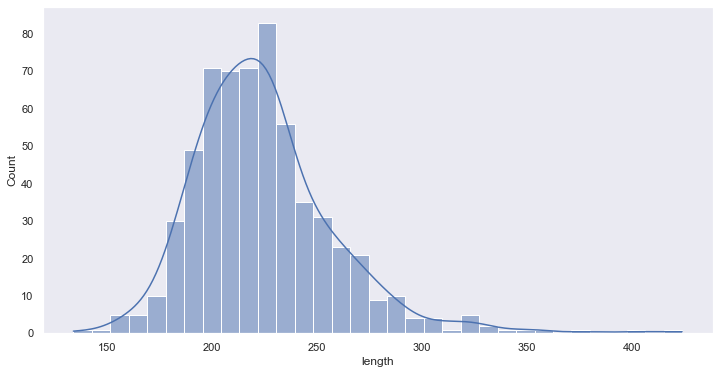

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(x='length', data=spotify, kde=True);

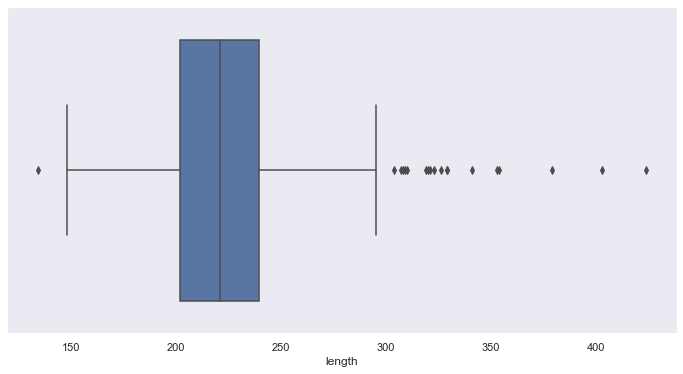

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='length', data=spotify);

In [27]:
spotify['length'].describe()

count    603.000000
mean     224.674959
std       34.130059
min      134.000000
25%      202.000000
50%      221.000000
75%      239.500000
max      424.000000
Name: length, dtype: float64

In [28]:
spotify.iloc[spotify['length'].argmax()]

song                              TKO
artist              Justin Timberlake
genre                       dance pop
year                             2013
beats_per_minute                  138
energy                             68
danceability                       61
loudness                           -7
liveness                           43
valence                            49
length                            424
acousticness                        1
speechiness                        24
popularity                         58
groups                        100-150
Name: 188, dtype: object

In [29]:
spotify.iloc[spotify['length'].argmin()]

song                Mark My Words
artist              Justin Bieber
genre                canadian pop
year                         2015
beats_per_minute              114
energy                         26
danceability                   38
loudness                       -9
liveness                       17
valence                        52
length                        134
acousticness                   88
speechiness                     3
popularity                     63
groups                    100-150
Name: 330, dtype: object

* The average length of a song is 225 seconds
* 75% of the songs last less than 240 seconds
* "TKO" by Justin Timberlake is the longest song (424 seconds)
* "Mark my words" by Justin Bieber is the shortest one (134 seconds)

### Speechiness

In [30]:
spotify.sort_values(by='speechiness', ascending=False).head(5)[['song', 'artist', 'year', 'speechiness']]

,song,artist,year,speechiness
200,How Ya Doin'? (feat. Missy Elliott),Little Mix,2013,48
14,Like A G6,Far East Movement,2010,45
364,Love Yourself,Justin Bieber,2016,44
271,Love Yourself,Justin Bieber,2015,44
266,I Luh Ya Papi,Jennifer Lopez,2014,42


* "How Ya Doin'?" by Little Mix is the song with the highest number of spoken words

### Acousticness

In [31]:
spotify.sort_values(by='acousticness', ascending=False).head(5)[['song', 'artist', 'year', 'acousticness']]

,song,artist,year,acousticness
431,Start,John Legend,2016,99
255,Not About Angels,Birdy,2014,97
186,Clown,Emeli Sandé,2013,92
210,All of Me,John Legend,2014,92
96,Turning Page,Sleeping At Last,2011,91


* The most acoustic song is "Start" by John Legend

### Loudness

In [32]:
spotify.sort_values(by='loudness', ascending=False).head(10)[['song', 'artist', 'year', 'loudness']]

,song,artist,year,loudness
108,What Makes You Beautiful,One Direction,2012,-2
198,Pom Poms,Jonas Brothers,2013,-2
116,Starships,Nicki Minaj,2012,-2
498,Rich Boy,Galantis,2017,-2
30,3,Britney Spears,2010,-2
154,Clarity,Zedd,2013,-3
508,One Kiss (with Dua Lipa),Calvin Harris,2018,-3
427,True Colors,Zedd,2016,-3
146,Don't You Worry Child - Radio Edit,Swedish House Mafia,2013,-3
418,WTF (Where They From),Missy Elliott,2016,-3


* The loudest songs are "What Makes You Beautiful" by One Direction, "Pom Poms" by Jonas Brothers, "Starships" by Nicki Minaj, "Rich Boy" by Galantis and "3" by Britney Spears

## Correlation Matrix

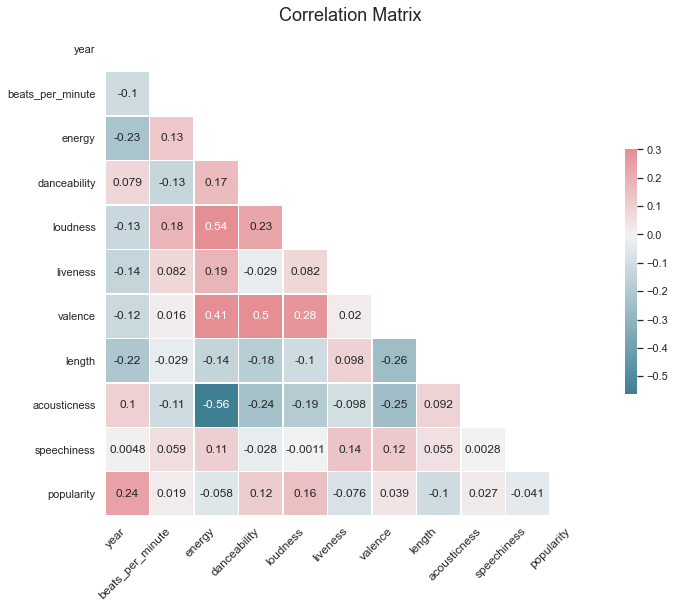

In [33]:
corr = spotify.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(style="white")
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium')
ax.set_title('Correlation Matrix', fontsize =18);